# Librerias

In [509]:
# Librerias

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_classif, SelectKBest
import numpy as np
import json
from pickle import dump

# PASO 1: Planteamiento del problema y Recopilación de Datos.

-PLANTEAMIENTO DEL PROBLEMA:

- Queremos un modelo que prediga los precios.


-RECOPILACION DE DATOS:

In [510]:
#Recopilar datos

data = pd.read_csv("../data/raw/AB_NYC_2019.csv")

data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


# PASO 2: Exploración y Limpieza de Datos.

- Obtener dimensiones del dataset

In [511]:
#Obtener las dimensiones

data.shape

(48895, 16)

- Obtener informacion sobre tipos de datos y valores nulos.

In [512]:
#Obtener información sobre tipo de datos y valores nulos.

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [513]:

data.isnull().sum().sort_values(ascending=False)

last_review                       10052
reviews_per_month                 10052
host_name                            21
name                                 16
neighbourhood_group                   0
neighbourhood                         0
id                                    0
host_id                               0
longitude                             0
latitude                              0
room_type                             0
price                                 0
number_of_reviews                     0
minimum_nights                        0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

-Conclusiones:

- Dimensiones: Hay un total de 48895 inmuebles de AirBnB en Nueva York con 16 columnas de información.

- Valores nulos: Las variables last-review y reviews per month cuentan con 10052 valores nulos. Las variables name y host_name tambien tienen valores nulos pero en muy menos medida.

- Tipo de datos: Hay un total de 6 variables categoricas y 10 variables numéricas.

- Eliminacion de duplicados

In [514]:
#Funcion para eliminar duplicados

#Columna identificadora del Dataset.

def EraseDuplicates(dataset, id = "id"):
    older_shape = dataset.shape
    if (dataset.drop(id, axis = 1).duplicated().sum()):
        print ("Erase duplicates...")
        dataset.drop(id, axis = 1, inplace = True)
        dataset.drop_duplicates()
        print(f"Total number of duplicates {dataset.duplicated().sum()}")
    else:
        print ("No coincidences.")
        dataset.drop(id, axis=1, inplace = True)
        pass
    
    print (f"The older dimension of dataset is {older_shape}, and the new dimension is {dataset.shape}.")
    
    return dataset

EraseDuplicates(data)

data


No coincidences.
The older dimension of dataset is (48895, 16), and the new dimension is (48895, 15).


,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


- Eliminacion de datos irrelevantes.

In [515]:
#Funcion para eliminar datos irrelevantes.

irrelevant_lst = ["name","host_id","host_name","neighbourhood","latitude","longitude","last_review","reviews_per_month"]

def EraseIrrelevants(dataset, lst):
    older_shape = data.shape
    print("Erase irrelevant´s dates...")
    dataset.drop(lst, axis = 1, inplace = True)
    print (f"The old dimension of dataset is {older_shape}, and the new dimension is {dataset.shape}.")
    return dataset

EraseIrrelevants(data, irrelevant_lst)

data

Erase irrelevant´s dates...
The old dimension of dataset is (48895, 15), and the new dimension is (48895, 7).


,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Brooklyn,Private room,149,1,9,6,365
1,Manhattan,Entire home/apt,225,1,45,2,355
2,Manhattan,Private room,150,3,0,1,365
3,Brooklyn,Entire home/apt,89,1,270,1,194
4,Manhattan,Entire home/apt,80,10,9,1,0
...,...,...,...,...,...,...,...
48890,Brooklyn,Private room,70,2,0,2,9
48891,Brooklyn,Private room,40,4,0,2,36
48892,Manhattan,Entire home/apt,115,10,0,1,27
48893,Manhattan,Shared room,55,1,0,6,2


-CRITERIOS DE ELIMINACION

- id: Es el identificador del dataset, no da información alguna.

- name, host_id, host_name: información totalmente irrelevante sobre el propietario del inmueble.

- last_reviews, reviews_per_month: campos con un considerable número de valores vacios.

- neighbourhood, latitude y longitude: Estos campos no dan información relevante en cuanto al precio teniendo en cuenta que contamos con el campo neighbourhood_group que ya nos da una ubicación de la zona en la que se encuentra y está mucho más ordenada y fácil de procesar.

# PASO 3: Analisis de variables univariantes

- Analisis sobre variables categóricas

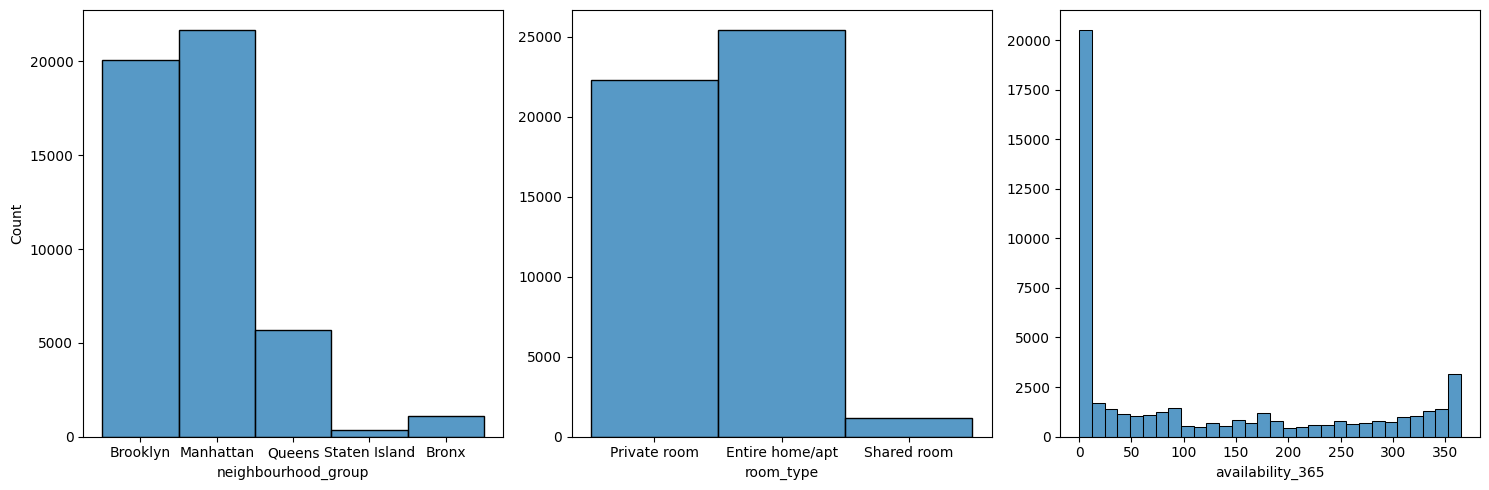

In [522]:
# Analisis sobre variables categoricas

def CategoricGraf(dataset):
    #Creamos la figura
    fig, axis = plt.subplots(1, 3, figsize=(15,5))

    #Creamos las graficas necesarias
    sns.histplot( ax = axis[0], data = dataset, x = "neighbourhood_group")
    sns.histplot( ax = axis[1], data = dataset, x = "room_type").set(ylabel = None)
    sns.histplot( ax = axis[2], data = dataset, x = "availability_365").set(ylabel = None)

    #Mostramos el grafico.
    plt.tight_layout()
    plt.show()

CategoricGraf(data)

-Conclusiones:

- Neighbourhood_group: El grueso de la muestra se concentra en Manhattan y Brooklyn respectivamente, las viviendas en Queens y el Bronx no superan el 20% del total de la muestra y las que se encuentran en Staten Island son prácticamente residuales.

- Room_type: El 90% de la muestra pertenecen a los tipo Private room y Entire home/apt room_type. Entre ellas hay una pequeña diferencia a favor de la clase Entire home.

- Availability_365: La gran mayoria de las viviendas de la muestra no tienen disponibilidad, pero también vemos una cantidad considerable de viviendas con disponibilidad elevada en el rango de 0 a 100 días. La disponibilidad aumenta progresivamente a partir de los 200 días sin bajar, siendo el segundo punto más alto de la gráfica la disponibilidad total (365 días.)

- Analisis sobre variables numéricas

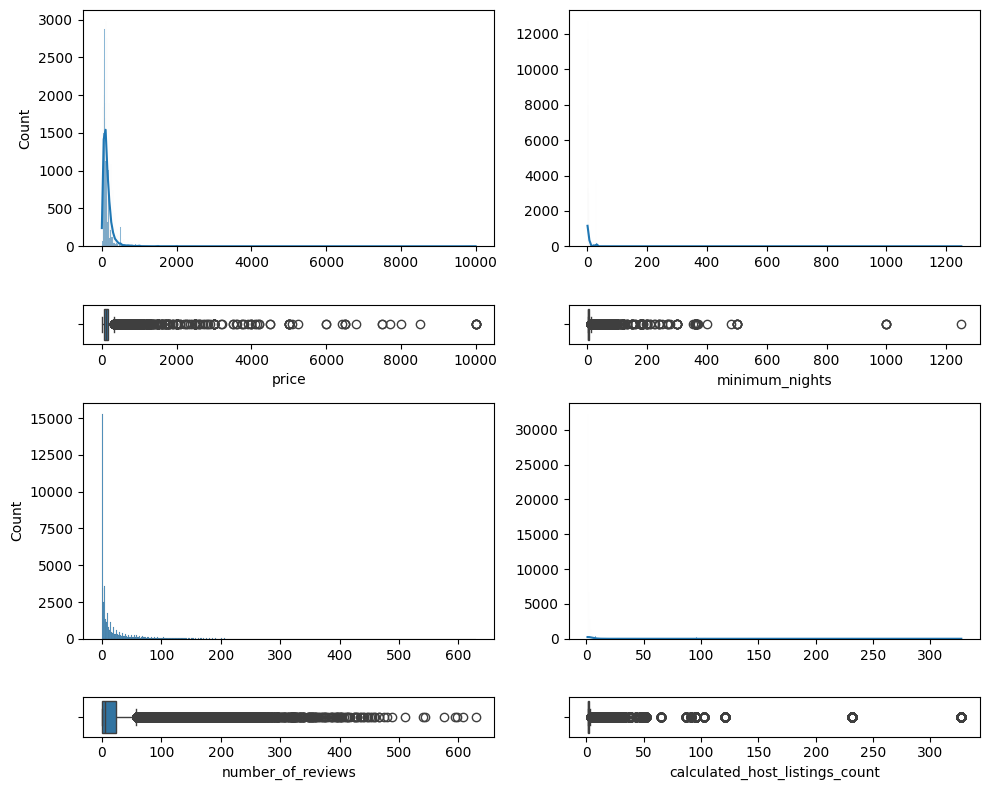

In [523]:
# Analisis sobre variables numericas

def NumericalGraf(dataset):
    #Creamos la figura
    fig, axis = plt.subplots(4, 2, figsize=(10,8), gridspec_kw={"height_ratios" : [6,1,6,1]})

    #Creamos las graficas necesarias
    sns.histplot( ax = axis[0,0], data = dataset, x = "price", kde=True).set(xlabel=None)
    sns.boxplot( ax = axis[1,0], data = dataset, x = "price")
    sns.histplot( ax = axis[0,1], data = dataset, x = "minimum_nights", kde=True).set(ylabel=None, xlabel=None)
    sns.boxplot( ax = axis[1,1], data = dataset, x = "minimum_nights")
    sns.histplot( ax = axis[2,0], data = dataset, x = "number_of_reviews").set(xlabel=None)
    sns.boxplot(ax = axis[3,0], data = dataset, x = "number_of_reviews")
    sns.histplot( ax = axis[2,1], data = dataset, x = "calculated_host_listings_count", kde=True).set(ylabel=None, xlabel=None)
    sns.boxplot( ax = axis[3,1], data = dataset, x = "calculated_host_listings_count")
    
    plt.tight_layout()
    plt.show()

NumericalGraf(data)

    

- Analisis de variables filtrada para ver mejor los datos.

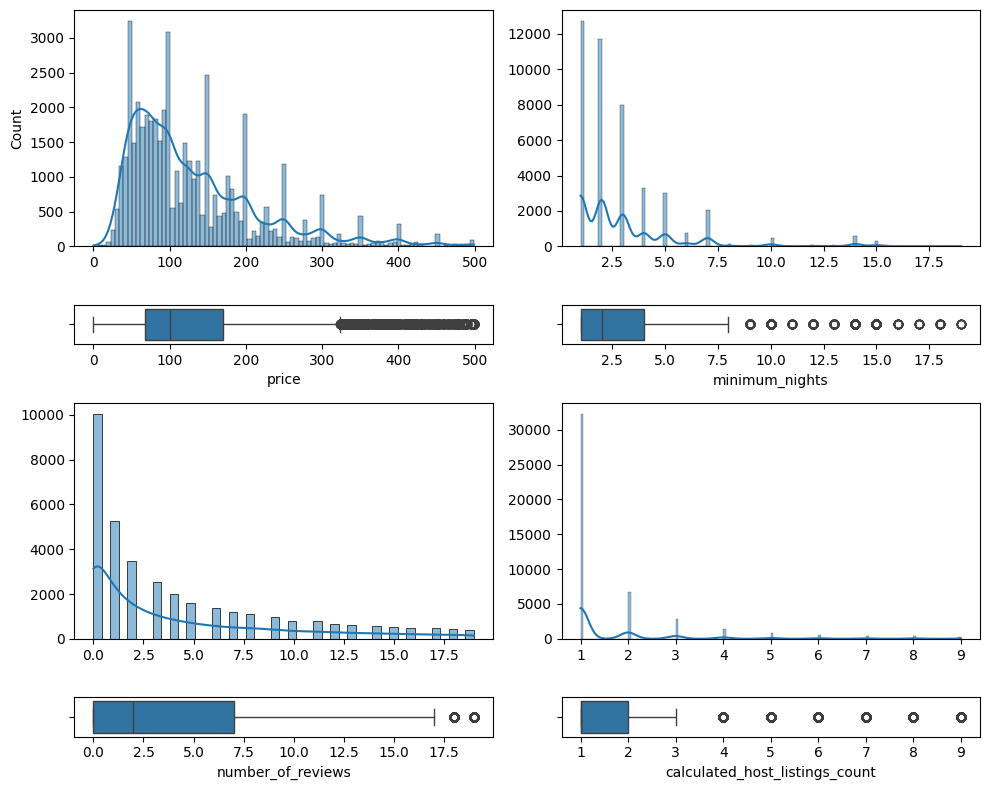

In [524]:
def FiltNumericalGraf(dataset):
    #Creamos la figura
    fig, axis = plt.subplots(4, 2, figsize=(10,8), gridspec_kw={"height_ratios" : [6,1,6,1]})

    #Creamos las graficas necesarias
    sns.histplot( ax = axis[0,0], data = dataset[dataset["price"] < 500], x = "price", kde=True).set(xlabel=None)
    sns.boxplot( ax = axis[1,0], data = dataset[dataset["price"] < 500], x = "price")
    sns.histplot( ax = axis[0,1], data = dataset[dataset["minimum_nights"] < 20], x = "minimum_nights", kde=True).set(ylabel=None, xlabel=None)
    sns.boxplot( ax = axis[1,1], data = dataset[dataset["minimum_nights"] < 20], x = "minimum_nights")
    sns.histplot( ax = axis[2,0], data = dataset[dataset["number_of_reviews"] < 20], x = "number_of_reviews", kde=True).set(xlabel=None, ylabel=None)
    sns.boxplot(ax = axis[3,0], data = dataset[dataset["number_of_reviews"] < 20], x = "number_of_reviews")
    sns.histplot( ax = axis[2,1], data = dataset[dataset["calculated_host_listings_count"] < 10], x = "calculated_host_listings_count", kde=True).set(ylabel=None, xlabel=None)
    sns.boxplot( ax = axis[3,1], data = dataset[dataset["calculated_host_listings_count"] < 10], x = "calculated_host_listings_count")
    
    plt.tight_layout()
    plt.show()

FiltNumericalGraf(data)

-Conclusiones:

- Todas las gráficas presenta una distribución asimetrica positiva muy acentuada con una cola muy larga.

# PASO 4: Analisis de variable multivariante

- Analisis Price (Minimum Nights - Number of Reviews - Availability 365) numérico/numérico

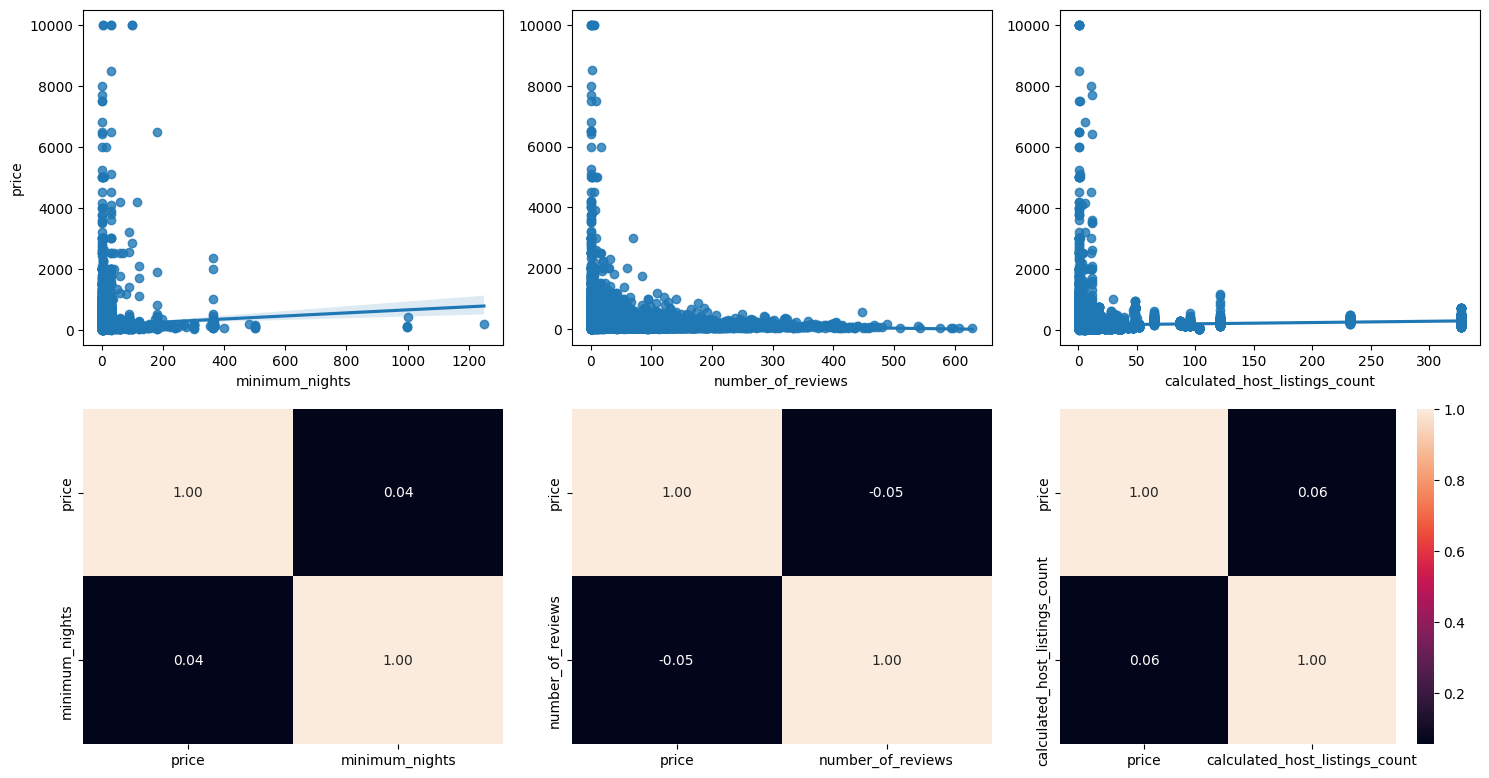

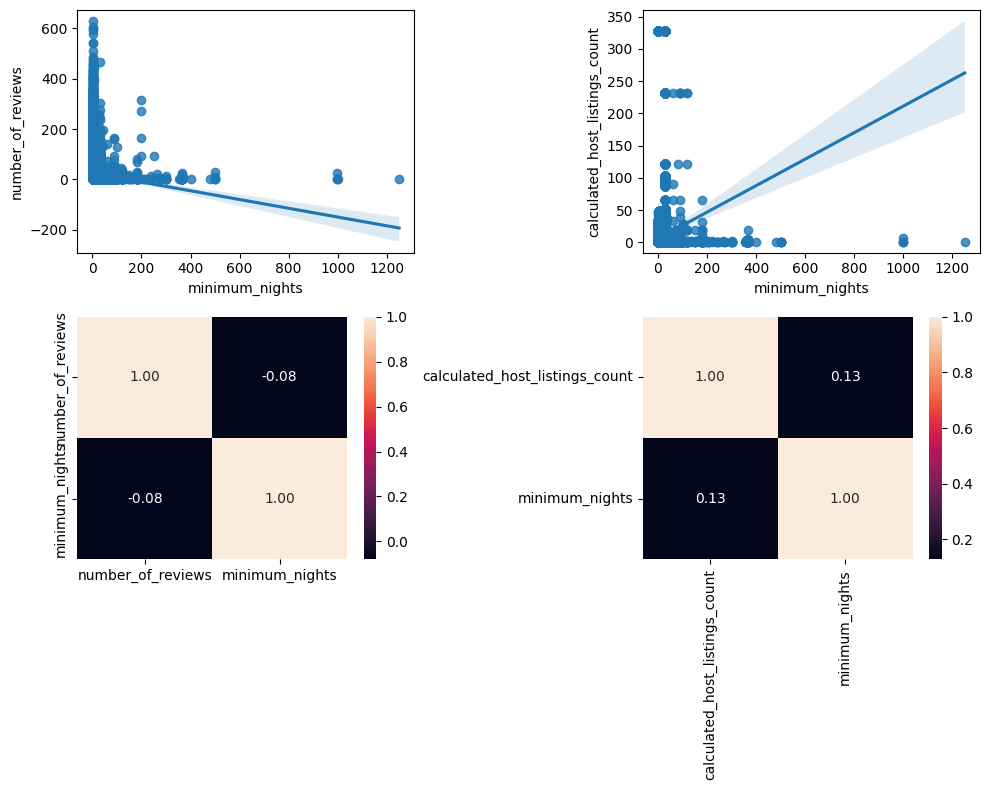

In [525]:
#Analisis numerico/numerico

def NumNumAnalysi(dataset, x, y_list):
    #Creamos la figura
    fig, axis = plt.subplots(2, 3, figsize=(15,8))

    #Creamos la grafica
    sns.regplot( ax = axis[0,0], data = dataset, x = y_list[0], y = x)
    sns.heatmap( data[[x,y_list[0]]].corr(), annot=True, fmt=".2f", ax = axis[1,0], cbar=False)
    sns.regplot( ax = axis[0,1], data = dataset, x = y_list[1], y = x).set(ylabel=None)
    sns.heatmap( data[[x,y_list[1]]].corr(), annot=True, fmt=".2f", ax = axis[1,1], cbar=False)
    sns.regplot( ax = axis[0,2], data = dataset, x = y_list[2], y = x).set(ylabel=None)
    sns.heatmap( data[[x, y_list[2]]].corr(), annot=True, fmt=".2f", ax = axis[1,2])

    plt.tight_layout()
    plt.show()

    #Creamos una segunda figura
    fig, axis = plt.subplots(2,2, figsize=(10,8))

    #Creamos la segunda grafica
    sns.regplot( ax = axis[0,0], data = dataset, x = y_list[0], y = y_list[1])
    sns.heatmap( data[[y_list[1], y_list[0]]].corr(), annot=True, fmt=".2f", ax = axis[1,0])
    sns.regplot( ax = axis[0,1], data = dataset, x = y_list[0], y = y_list[2])
    sns.heatmap( data[[y_list[2], y_list[0]]].corr(), annot=True, fmt=".2f", ax = axis[1,1])

    plt.tight_layout()
    plt.show()

NumNumAnalysi(data, "price", ["minimum_nights", "number_of_reviews","calculated_host_listings_count"])

-Conclusion:

- La correlación del price tanto con las minimum_nights como con las numbers_of_reviews es muy baja.

- Hay una alta correlación entre minimum_nights y calculated_host_listings_count

- Analisis Neighbourhood Group - Room Type (Categórico - Categórico)

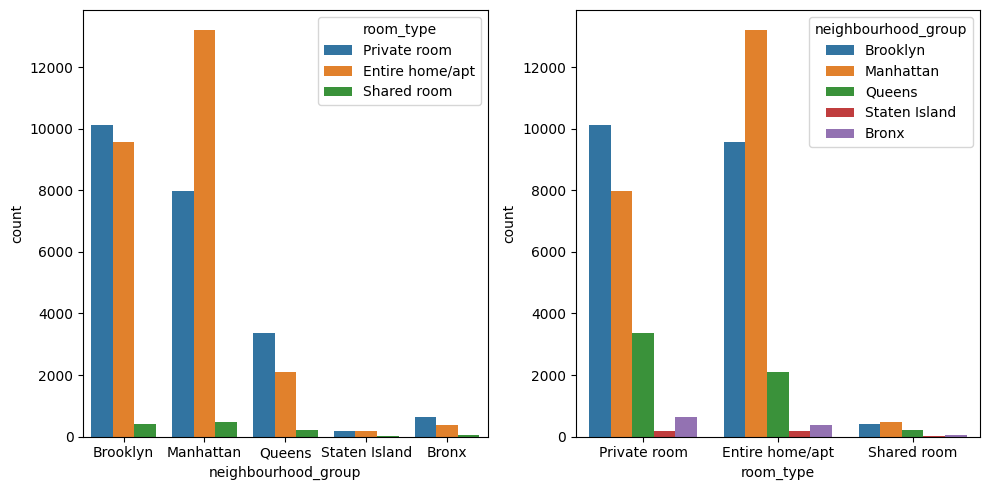

In [526]:
#Analisis categorico/categorico

def CatCatAnalysi(dataset):
    #Creamos la figura
    fig, axis = plt.subplots(1, 2, figsize=(10,5))

    #Creamos las graficas.
    sns.countplot(ax = axis[0], data = dataset, x = "neighbourhood_group", hue = "room_type")
    sns.countplot(ax = axis[1], data = dataset, x = "room_type", hue = "neighbourhood_group")

    plt.tight_layout()
    plt.show()

CatCatAnalysi(data)

-Conclusiones:

- La mayor cantidad de inmuebles son Entire/home en Manhattan.

- Brooklyn, Queens y el Bronx tienen un mayor número de private rooms. Queens es el barrio con más private rooms respecto a las demás categorias.

- Codificamos las variables categoricas

In [527]:
#Convertimos las columnas categoricas al Dtype category para optimizar los datos.

def ObjectToCategory(dataset, col):
    dataset[col] = dataset[col].astype("category")
    return dataset


ObjectToCategory(data, "neighbourhood_group")
ObjectToCategory(data, "room_type")

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   neighbourhood_group             48895 non-null  category
 1   room_type                       48895 non-null  category
 2   price                           48895 non-null  int64   
 3   minimum_nights                  48895 non-null  int64   
 4   number_of_reviews               48895 non-null  int64   
 5   calculated_host_listings_count  48895 non-null  int64   
 6   availability_365                48895 non-null  int64   
dtypes: category(2), int64(5)
memory usage: 2.0 MB


In [528]:
#Creamos el codificador

def Encoder(dataset, col):
    encoder = OneHotEncoder()
    encoding = encoder.fit_transform(dataset[[col]])
    dummie_col = pd.DataFrame(encoding.toarray(), columns=encoder.categories_)
    dataset = pd.concat([dataset, dummie_col], axis = 1)
    dataset.drop(col, axis=1, inplace=True)
    return dataset

data = (Encoder(data, "room_type"))
data = (Encoder(data, "neighbourhood_group"))


In [529]:
#Renombramos las columnas
data.rename(columns = {('Entire home/apt',) : "entire_home", ('Private room',) : "private_room", ('Shared room',) : "shared_room", ('Bronx',) : "bronx", ('Brooklyn',) : "brooklyn", ('Manhattan',) : "manhattan", ('Queens',) : "queens", ('Staten Island',) : "staten_island"}, inplace=True)

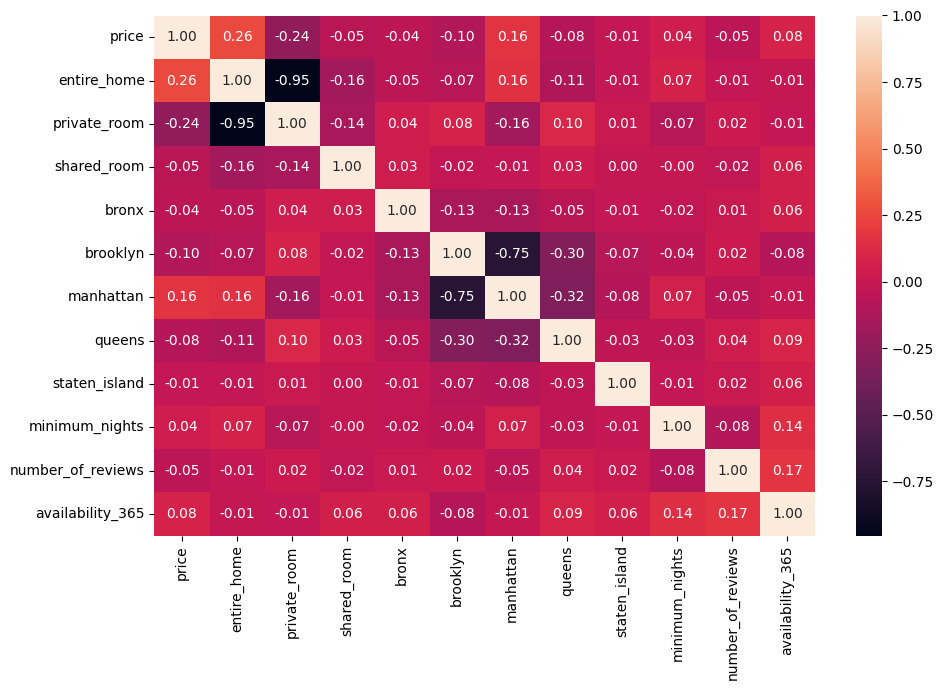

In [530]:
#Tabla de correlaciones
fig, axis = plt.subplots(figsize=(10,7))

sns.heatmap(data[["price","entire_home", "private_room", "shared_room", "bronx", "brooklyn", "manhattan", "queens", "staten_island", "minimum_nights","number_of_reviews","availability_365"]].corr(), annot=True, fmt=".2f")

plt.tight_layout()
plt.show()


- PRIMERAS CONCLUSIONES:

- La correlación entre los diferentes tipos de habitación y el precio es alta, exceptuando las habitaciones compartidas.

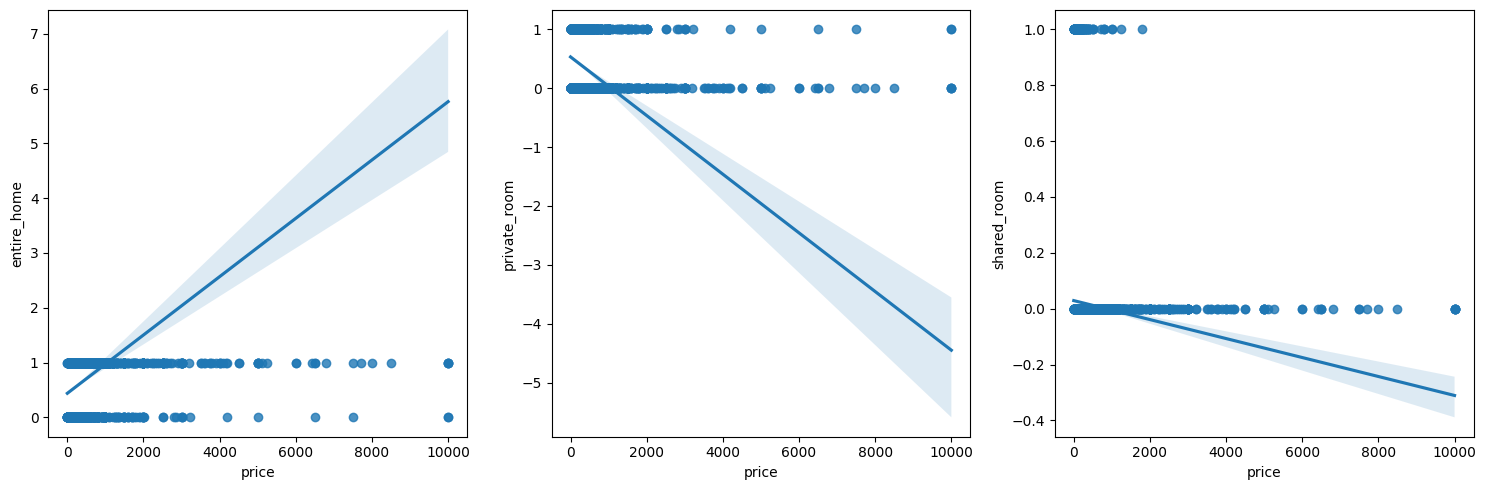

In [531]:
#Corroboración de la tabla
fig, axis = plt.subplots(1,3,figsize=(15,5))

sns.regplot(ax = axis[0], data = data, x = "price", y = "entire_home")
sns.regplot(ax = axis[1], data = data, x = "price", y = "private_room")
sns.regplot(ax = axis[2], data = data, x = "price", y = "shared_room")

plt.tight_layout()
plt.show()

- Corroboramos lo anteriormente visto. El precio aumenta dependiendo de tipo de inmueble que se va a alquilar.

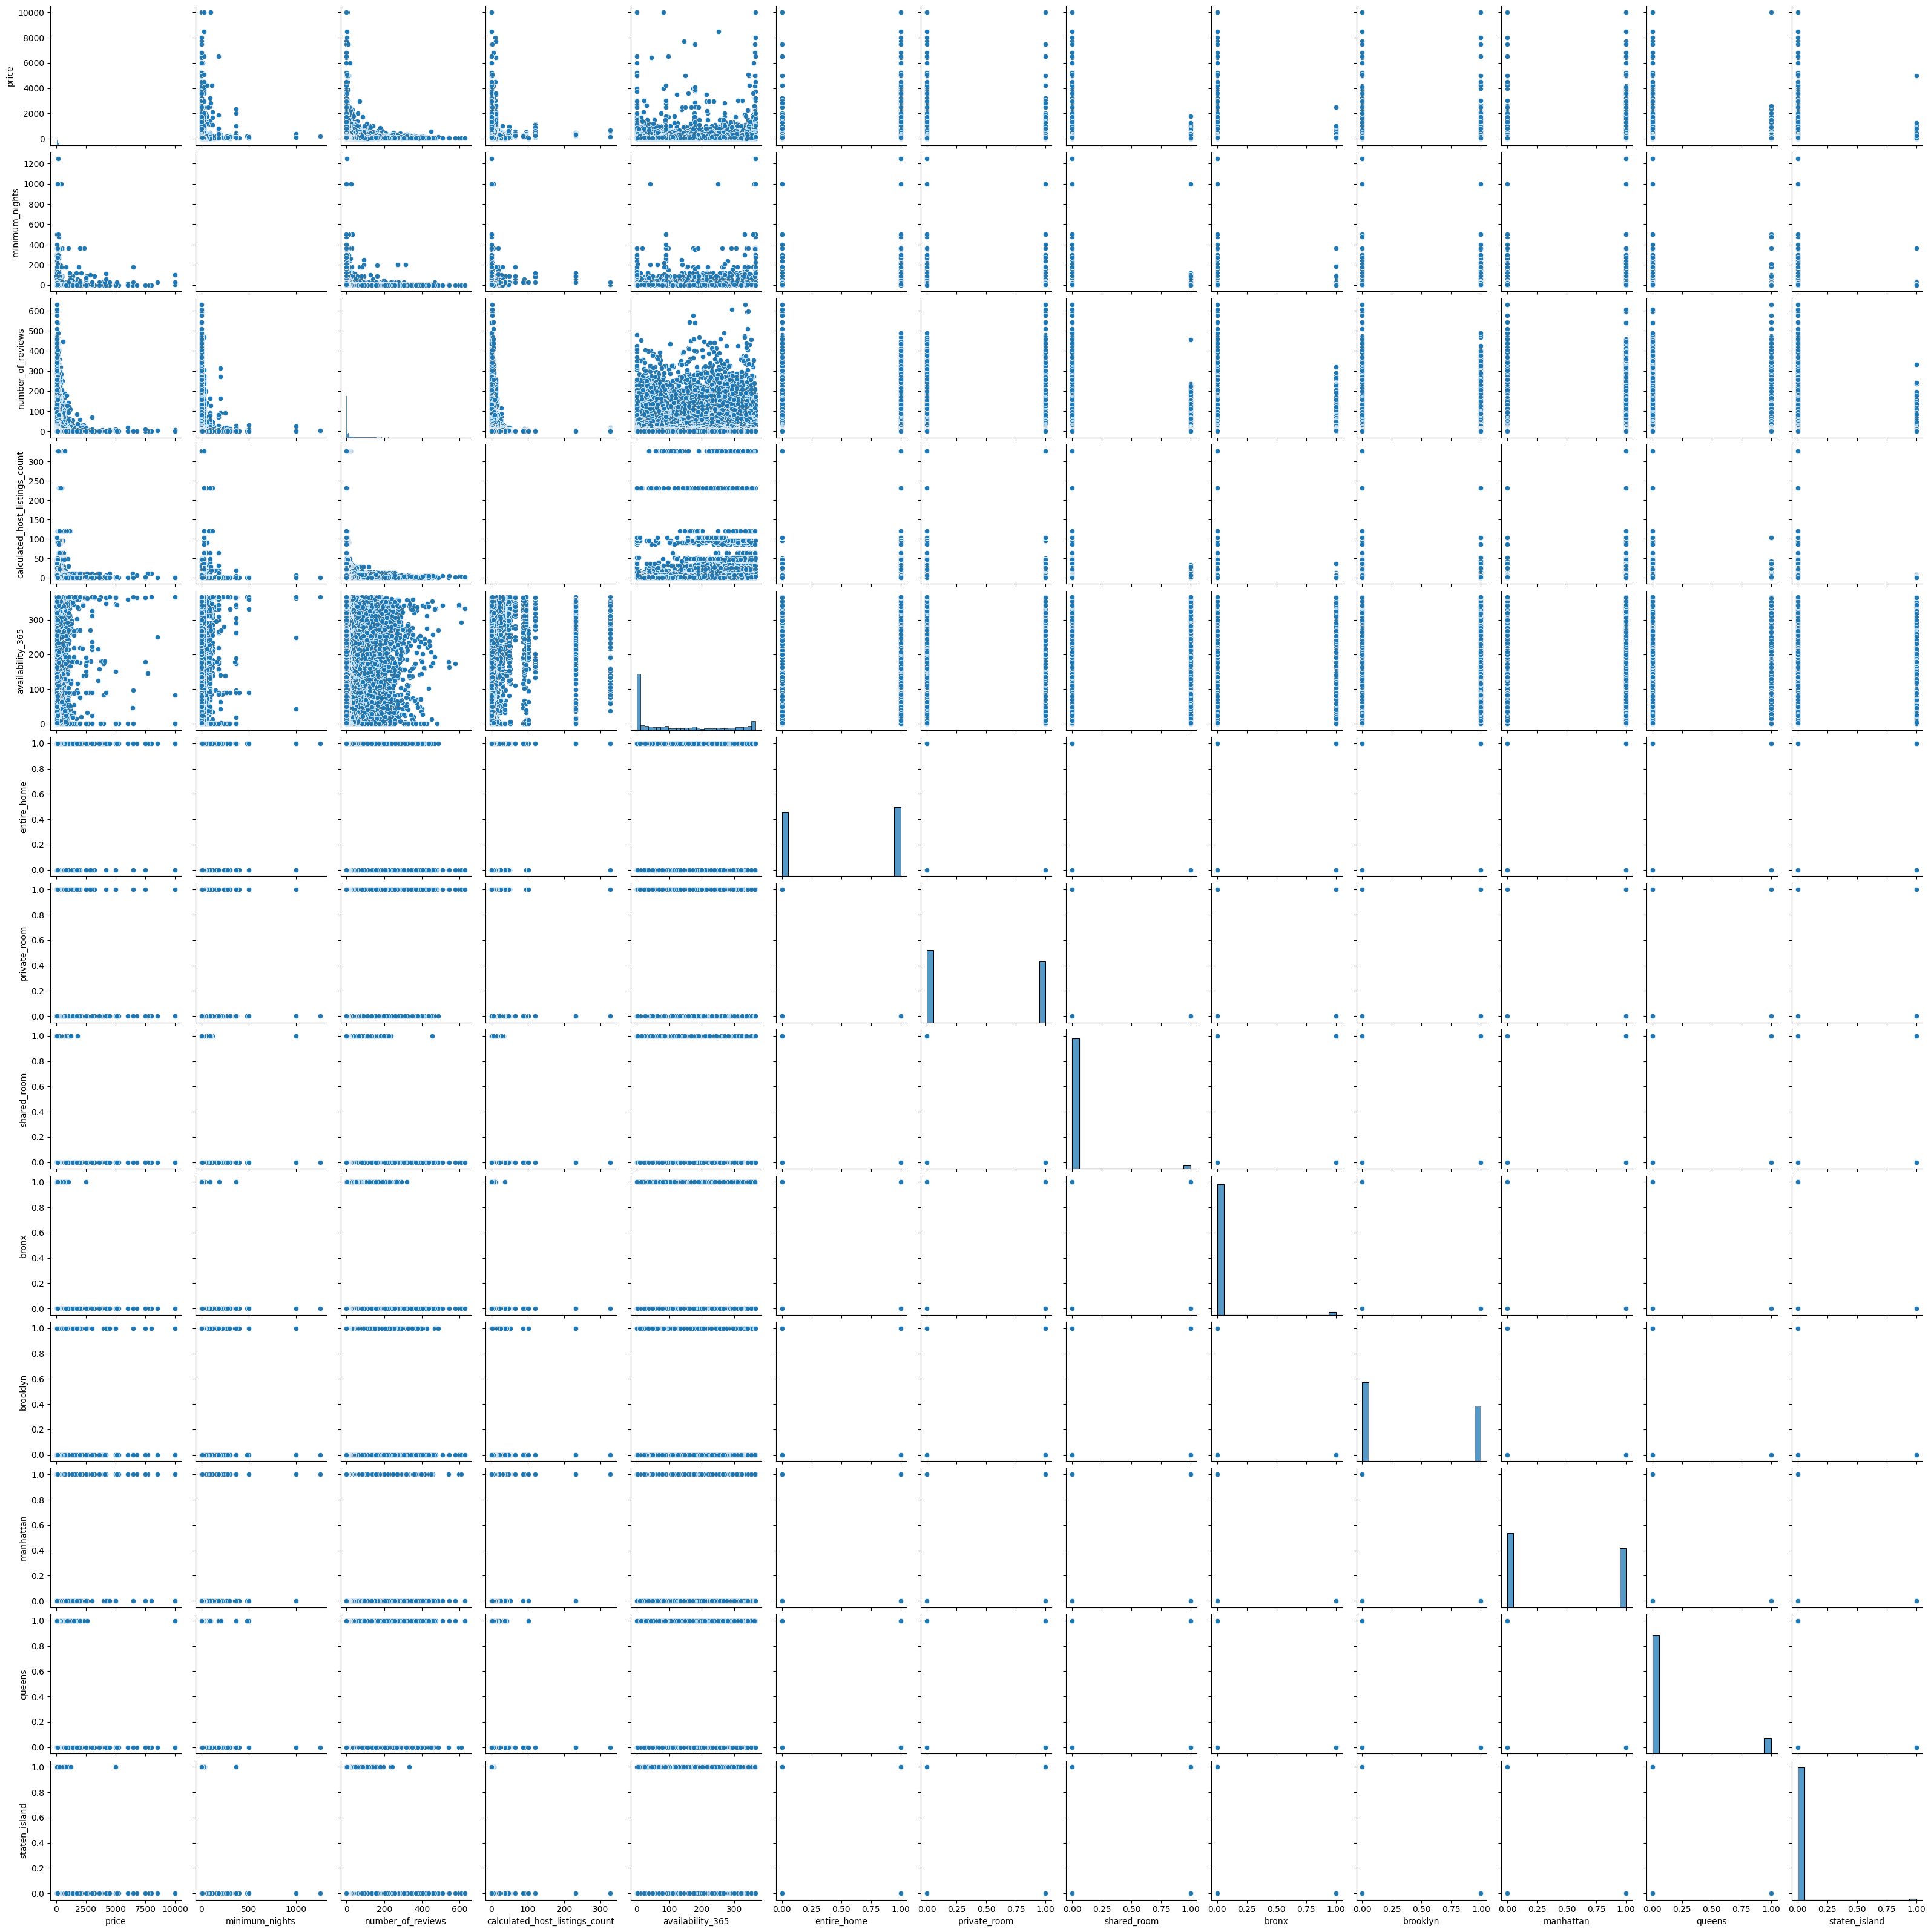

In [532]:
sns.pairplot(data=data)

# PASO 5: ingeniería de características.

- Analisis de Outliers

In [533]:
# Comprobamos las metricas de la tabla.

data.describe()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,entire_home,private_room,shared_room,bronx,brooklyn,manhattan,queens,staten_island
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,7.143982,112.781327,0.519665,0.456611,0.023724,0.022313,0.411167,0.443011,0.115881,0.007629
std,240.154170,20.510550,44.550582,32.952519,131.622289,0.499618,0.498119,0.152190,0.147701,0.492050,0.496747,0.320085,0.087009
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,69.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,106.000000,3.000000,5.000000,1.000000,45.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,175.000000,5.000000,24.000000,2.000000,227.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,10000.000000,1250.000000,629.000000,327.000000,365.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- Solamente viendo la tabla vemos que todos los campos menos los categoricos tienen una gran cantidad de outliers.

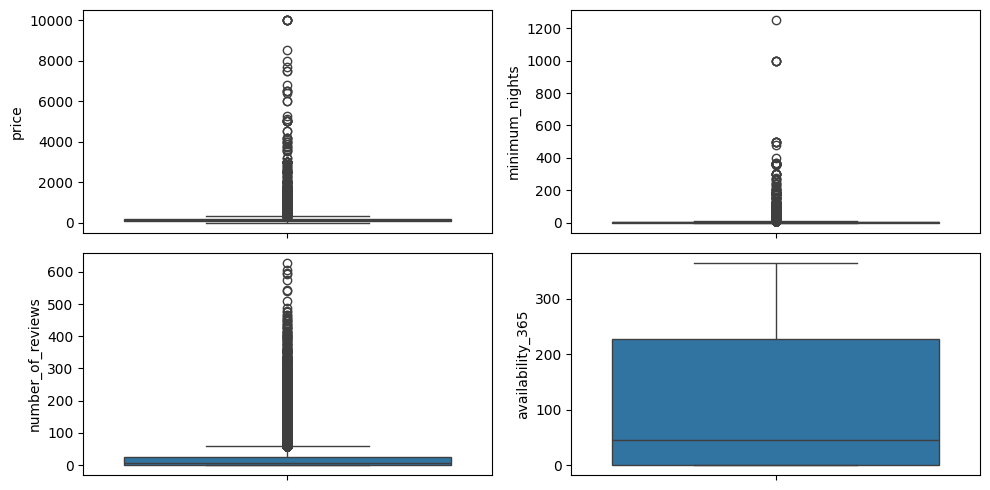

In [534]:
#Grafica de outliers

fig, axis = plt.subplots(2, 2, figsize=(10,5))

sns.boxplot( ax = axis [0,0], data = data, y = "price")
sns.boxplot( ax = axis [0,1], data = data, y = "minimum_nights")
sns.boxplot( ax = axis [1,0], data = data, y = "number_of_reviews")
sns.boxplot( ax = axis [1,1], data = data, y = "availability_365")

plt.tight_layout()
plt.show()

- Una vez comprobamos las graficas vemos que en efecto price, minimum nights y number of reviews tiene una gran cantidad de outliers.

- Availability_365 no tiene outliers

In [535]:
#Hacemos dos copias del dataset, una para el dataset con outliers y otra sin.

data_with_outliers = data.copy()
data_without_outliers = data.copy()

#Creamos una funcion para transformar los outliers.

def TransOutliers(dataset, col_outliers):
    stats = dataset[col_outliers].describe()
    
    #Establecemos los límites.
    # Los valores óptimos para sumarle al Q3 suelen ser 1.5*IQR, 1.75*IQR y 2*IQR.
    iqr = stats["75%"] - stats["25%"]
    upper_limit = float(stats["75%"] + (2 * iqr))
    lower_limit = float(stats["25%"] - (2 * iqr))
    
    if (lower_limit < 0):
        lower_limit = 0

    #Ajustamos el outlier por encima.
    dataset[col_outliers] = dataset[col_outliers].apply(lambda x : upper_limit if (x > upper_limit) else x)

    #Ajustamos el outlier por debajo.
    dataset[col_outliers] = dataset[col_outliers].apply(lambda x : lower_limit if (x < lower_limit) else x)

    #Guardamos los límites en un json.

    with open (f"../data/interim/outerliers_{col_outliers}.json", "w") as j:
        json.dump({"upper_limit" : upper_limit, "lower_limit" : lower_limit}, j)

    return dataset

TransOutliers (data_without_outliers, "minimum_nights")
TransOutliers (data_without_outliers, "number_of_reviews")
TransOutliers (data_without_outliers, "availability_365")

data_without_outliers

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,entire_home,private_room,shared_room,bronx,brooklyn,manhattan,queens,staten_island
0,149,1.0,9.0,6,365,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,225,1.0,45.0,2,355,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,150,3.0,0.0,1,365,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,89,1.0,70.0,1,194,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,80,10.0,9.0,1,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,70,2.0,0.0,2,9,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
48891,40,4.0,0.0,2,36,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
48892,115,10.0,0.0,1,27,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
48893,55,1.0,0.0,6,2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


- Analisis de valores faltantes.

In [539]:
#Comprobamos si existen valores faltantes.

data_with_outliers.isna().sum().sort_values()


price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
entire_home                       0
private_room                      0
shared_room                       0
bronx                             0
brooklyn                          0
manhattan                         0
queens                            0
staten_island                     0
dtype: int64

In [540]:

data_without_outliers.isna().sum().sort_values()

price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
entire_home                       0
private_room                      0
shared_room                       0
bronx                             0
brooklyn                          0
manhattan                         0
queens                            0
staten_island                     0
dtype: int64

En este caso no hay valores faltantes.

- Inferencia de Nuevas características.

In [20]:
#Inferencias de nuevas características.

En este caso no veo razones para crear nuevas características.

- Escalado de Valores

In [576]:
# Primero dividimos los dataframes entre test y train

features = ["entire_home","private_room","shared_room","bronx","brooklyn","manhattan","queens","staten_island","minimum_nights","number_of_reviews","availability_365"]
target_feature = ["price"]

def SplitData (dataset, num_features, target):
    x = dataset.drop(target, axis = 1)[num_features]
    y = dataset[target].squeeze()

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state= 42)

    return x_train, x_test, y_train, y_test

x_train_with_outliers, x_test_with_outliers, y_train, y_test = SplitData(data_with_outliers, features, target_feature)
x_train_without_outliers, x_test_without_outliers,_, _ = SplitData(data_without_outliers, features, target_feature)

y_train.to_excel("../data/processed/y_train.xlsx")
y_test.to_excel("../data/processed/y_test.xlsx")

np.False_

In [565]:

#Tenemos que escalar los dataset con Normalizacion y con Escala mM (min-Max)

#Normalizacion
def StandardScaleData(dataset, num_features):
    scaler = StandardScaler()
    scaler.fit(dataset)

    x_scaler = scaler.transform(dataset)
    x_scaler = pd.DataFrame(dataset, index = dataset.index, columns = num_features)
    
    if(dataset is x_train_with_outliers):
        dump(scaler, open("../data/interim/standar_scale_with_outliers.sav", "wb"))

    elif(dataset is x_train_without_outliers):
        dump(scaler, open("../data/interim/standar_scale_without_outliers.sav", "wb"))

    return x_scaler

x_train_with_outliers_standarscale = StandardScaleData(x_train_with_outliers, features)
x_train_without_outliers_standarscale = StandardScaleData(x_train_without_outliers,features)
x_test_with_outliers_standscale = StandardScaleData(x_test_with_outliers, features)
x_test_without_outliers_standscale = StandardScaleData(x_test_without_outliers, features)

In [570]:

#Escala mM
def MinMaxScaleData(dataset, num_features):
    scaler = MinMaxScaler()
    scaler.fit(dataset)

    x_scaler = scaler.transform(dataset)
    x_scaler = pd.DataFrame(dataset, index = dataset.index, columns = num_features)

    if(dataset is x_train_with_outliers):
        dump(scaler, open("../data/interim/min-Max_Scale_with_outliers.sav", "wb"))

    elif(dataset is x_train_without_outliers):
        dump(scaler, open("../data/interim/min-Max_Scale_without_outliers.sav", "wb"))

    return x_scaler

x_train_with_outliers_mMScaler = MinMaxScaleData(x_train_with_outliers, features)
x_train_without_outliers_mMScaler = MinMaxScaleData(x_train_without_outliers,features)
x_test_with_outliers_mMScaler = MinMaxScaleData(x_test_with_outliers, features)
x_test_without_outliers_mMScaler = MinMaxScaleData(x_test_without_outliers, features)

# PASO 6: Selección de caracteristicas

In [579]:
#Seleccion de caracteristicas
k = 11
def SelectFeatures(dataset, y, filename, k = k):
    sel_model = SelectKBest(f_classif, k=k)
    sel_model.fit(dataset, y)
    col_name = sel_model.get_support()
    x_sel = pd.DataFrame(sel_model.transform(dataset), columns = dataset.columns.values[col_name])
    dump(sel_model, open(f"../data/interim/{filename}.sav", "wb"))
    return x_sel


In [580]:

#Dataset sin normalizacion
x_train_sel_with_outliers = SelectFeatures(x_train_with_outliers, y_train, "x_train_with_outliers")
x_test_sel_with_outliers = SelectFeatures(x_test_with_outliers, y_test, "x_test_with_outliers")
x_train_sel_without_outliers = SelectFeatures(x_train_without_outliers, y_train, "x_train_without_outliers")
x_test_sel_without_outliers = SelectFeatures(x_test_without_outliers, y_test, "x_test_without_outliers")

#Dataset Normalizado
x_train_sel_with_outliers_standarscale = SelectFeatures(x_train_with_outliers_standarscale, y_train, "x_train_with_outliers_standarscale")
x_test_sel_with_outliers_standarscale = SelectFeatures(x_test_with_outliers_standscale, y_test, "x_test_with_outliers_standscale")
x_train_sel_without_outliers_standarscale = SelectFeatures(x_train_without_outliers_standarscale, y_train, "x_train_sel_without_outliers_standarscale")
x_test_sel_without_outliers_standarscale = SelectFeatures(x_test_without_outliers_standscale, y_test, "x_test_without_outliers_standscale")

#Dataset Escalado min-Max
x_train_sel_with_outliers_mMScale = SelectFeatures(x_train_with_outliers_mMScaler, y_train, "x_test_with_outliers_mMScaler")
x_test_sel_with_outliers_mMScale = SelectFeatures(x_test_with_outliers_mMScaler, y_test, "x_test_with_outliers_mMScaler")
x_train_sel_without_outliers_mMScale = SelectFeatures(x_train_without_outliers_mMScaler, y_train, "x_train_without_outliers_mMScaler")
x_test_sel_without_outliers_mMScale = SelectFeatures(x_test_with_outliers_mMScaler, y_test, "x_test_with_outliers_mMScaler")

In [586]:
#Para acabara añadimos el target a los datasets.

target = "price"
def AgreeTarget(dataset, y, target = target):
    dataset[target] = list(y) #Si no le pones el list le pasa los indices y se crear valores NaN
    return dataset

AgreeTarget(x_train_sel_with_outliers, y_train)
AgreeTarget(x_test_sel_with_outliers, y_test)
AgreeTarget(x_train_sel_without_outliers, y_train)
AgreeTarget(x_test_sel_without_outliers, y_test)
AgreeTarget(x_train_sel_with_outliers_standarscale, y_train)
AgreeTarget(x_test_sel_with_outliers_standarscale, y_test)
AgreeTarget(x_train_sel_without_outliers_standarscale, y_train)
AgreeTarget(x_test_sel_without_outliers_standarscale, y_test)
AgreeTarget(x_train_sel_with_outliers_mMScale, y_train)
AgreeTarget(x_test_sel_with_outliers_mMScale, y_test)
AgreeTarget(x_train_sel_without_outliers_mMScale, y_train)
AgreeTarget(x_test_sel_without_outliers_mMScale, y_test)

,entire_home,private_room,shared_room,bronx,brooklyn,manhattan,queens,staten_island,minimum_nights,number_of_reviews,availability_365,price
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,62.0,189.0,89
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,21.0,0.0,73.0,30
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,17.0,0.0,120
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,5.0,272.0,470
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,30.0,30.0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
9774,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,18.0,68.0,215
9775,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,294.0,100
9776,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,5.0,5.0,70
9777,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,500


In [587]:
#Para acabar nos guardamos los datasets en un excel

def DataToExcel(dataset, filename):
    return dataset.to_excel(f"../data/processed/{filename}.xlsx")

DataToExcel(x_train_sel_with_outliers, "x_train_sel_with_outliers")
DataToExcel(x_test_sel_with_outliers, "x_test_sel_with_outliers")
DataToExcel(x_train_sel_without_outliers, "x_train_sel_without_outliers")
DataToExcel(x_test_sel_without_outliers, "x_test_sel_without_outliers")
DataToExcel(x_train_sel_with_outliers_standarscale, "x_train_sel_with_outliers_standarscale")
DataToExcel(x_test_sel_with_outliers_standarscale, "x_test_sel_with_outliers_standarscale")
DataToExcel(x_train_sel_without_outliers_standarscale, "x_train_sel_without_outliers_standarscale")
DataToExcel(x_test_sel_without_outliers_standarscale, "x_test_sel_without_outliers_standarscale")
DataToExcel(x_train_sel_with_outliers_mMScale, "x_train_sel_with_outliers_mMScale")
DataToExcel(x_test_sel_with_outliers_mMScale, "x_test_sel_with_outliers_mMScale")
DataToExcel(x_train_sel_without_outliers_mMScale, "x_train_sel_without_outliers_mMScale")
DataToExcel(x_test_sel_without_outliers_mMScale, "x_test_sel_without_outliers_mMScale")
